## **The start of analysis with all empty values substituted for mean**

In [1]:
## Import Libraries and Suppress Warnings
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import MinMaxScaler

# Suppress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [2]:
## Load and Display the Data
try:
    dataCo2 = pd.read_csv('CO2.csv')
    dataCo2 = pd.DataFrame(dataCo2)
except FileNotFoundError:
    print("data can't be found")

print(dataCo2)  # to see the basic structure of the data
dataCo2 = dataCo2.drop(["UN M49"], axis=1) # This is recommended by the author as the column is not yet reliable.
drop_global = dataCo2[dataCo2["Country"] == "Global"].index
dataCo2 = dataCo2.drop(drop_global) # here we drop the global rows completely.


           Country ISO 3166-1 alpha-3  UN M49  Year         Total  \
0      Afghanistan                AFG       4  1750           NaN   
1      Afghanistan                AFG       4  1751           NaN   
2      Afghanistan                AFG       4  1752           NaN   
3      Afghanistan                AFG       4  1753           NaN   
4      Afghanistan                AFG       4  1754           NaN   
...            ...                ...     ...   ...           ...   
61420       Global                WLD     756  2018  36766.912297   
61421       Global                WLD     756  2019  37039.881946   
61422       Global                WLD     756  2020  35007.822458   
61423       Global                WLD     756  2021  36815.680623   
61424       Global                WLD     756  2022  37150.949699   

               Coal           Oil          Gas       Cement     Flaring  \
0               NaN           NaN          NaN     0.000000         NaN   
1               NaN  

In [3]:
## Normalize Data
copy = dataCo2.drop(["Country", "ISO 3166-1 alpha-3", "Year"], axis=1)

# Don’t want to normalize year so it may be used later
normalizer = MinMaxScaler()
normalizedCo2 = normalizer.fit_transform(copy)
normalizedData = pd.DataFrame(normalizedCo2, columns=copy.columns)
print(normalizedData)

          Total  Coal       Oil  Gas  Cement  Flaring  Other  Per Capita
0           NaN   NaN       NaN  NaN     0.0      NaN    NaN         NaN
1           NaN   NaN       NaN  NaN     0.0      NaN    NaN         NaN
2           NaN   NaN       NaN  NaN     0.0      NaN    NaN         NaN
3           NaN   NaN       NaN  NaN     0.0      NaN    NaN         NaN
4           NaN   NaN       NaN  NaN     0.0      NaN    NaN         NaN
...         ...   ...       ...  ...     ...      ...    ...         ...
61147  0.053929   0.0  0.232577  0.0     0.0      0.0    0.0         0.0
61148  0.055147   0.0  0.237829  0.0     0.0      0.0    0.0         0.0
61149  0.023545   0.0  0.101540  0.0     0.0      0.0    0.0         0.0
61150  0.025572   0.0  0.110284  0.0     0.0      0.0    0.0         0.0
61151  0.037278   0.0  0.160766  0.0     0.0      0.0    0.0         0.0

[61152 rows x 8 columns]


In [4]:
## Select Numerical Data and Impute Missing Values with Mean
data = dataCo2.select_dtypes(include=[np.number, "float"]).columns.to_list()
selected_data = dataCo2[data]

# Imputation with mean

imputed_dataframe = selected_data.fillna(selected_data.mean())
print(imputed_dataframe)
print(imputed_dataframe.mean())

       Year       Total       Coal         Oil       Gas  Cement   Flaring  \
0      1750   77.441187  36.142576   28.503095  12.11878     0.0  0.897926   
1      1751   77.441187  36.142576   28.503095  12.11878     0.0  0.897926   
2      1752   77.441187  36.142576   28.503095  12.11878     0.0  0.897926   
3      1753   77.441187  36.142576   28.503095  12.11878     0.0  0.897926   
4      1754   77.441187  36.142576   28.503095  12.11878     0.0  0.897926   
...     ...         ...        ...         ...       ...     ...       ...   
61147  2018  614.629246   0.000000  614.629246   0.00000     0.0  0.000000   
61148  2019  628.507482   0.000000  628.507482   0.00000     0.0  0.000000   
61149  2020  268.338935   0.000000  268.338935   0.00000     0.0  0.000000   
61150  2021  291.446123   0.000000  291.446123   0.00000     0.0  0.000000   
61151  2022  424.853708   0.000000  424.853708   0.00000     0.0  0.000000   

          Other  Per Capita  
0      5.613362    4.814729  
1  

In [5]:
## Combine Imputed Data with Original Non-Numerical Columns
Mean_dataset = pd.concat([dataCo2["Country"], dataCo2["ISO 3166-1 alpha-3"], dataCo2["Year"], imputed_dataframe], axis=1)
# Add back Country, ISO code and Year to the dataset again.
Mean_dataset = Mean_dataset.rename({"ISO 3166-1 alpha-3": "ISO Code", "Total": "Total Co2 Emission (Mt)", "Per Capita": "Per Capita (t)"}, axis=1)
Mean_dataset = Mean_dataset.dropna()
print("Number of NaN values per column\n", Mean_dataset.isna().sum())  # Check for NaN values.
print(Mean_dataset)




Number of NaN values per column
 Country                    0
ISO Code                   0
Year                       0
Year                       0
Total Co2 Emission (Mt)    0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita (t)             0
dtype: int64
                      Country ISO Code  Year  Year  Total Co2 Emission (Mt)  \
0                 Afghanistan      AFG  1750  1750                77.441187   
1                 Afghanistan      AFG  1751  1751                77.441187   
2                 Afghanistan      AFG  1752  1752                77.441187   
3                 Afghanistan      AFG  1753  1753                77.441187   
4                 Afghanistan      AFG  1754  1754                77.441187   
...                       ...      ...   ...   ...                      ...   
61147  International Aviation      XIA  2018  2018   

In [6]:
# Drop the rows where the "Country" column is "Global"
# drop_global = Mean_dataset[Mean_dataset["Country"] == "Global"].index
# Mean_dataset_without_global = Mean_dataset.drop(drop_global)


# Check the resulting DataFrame
print("DataFrame after dropping 'Global':\n", Mean_dataset.head(),"\n")

# Calculate and print mean, median, and std deviation after removing the "Global" rows
mean_values = Mean_dataset.drop(columns=['Year']).mean().round(3)
median_values = Mean_dataset.drop(columns=['Year']).median().round(3)
std_values = Mean_dataset.drop(columns=['Year']).std().round(3)

print("Mean values:\n", mean_values,"\n")
print("Median values:\n", median_values,"\n")
print("Standard deviation values:\n", std_values,"\n")



DataFrame after dropping 'Global':
        Country ISO Code  Year  Year  Total Co2 Emission (Mt)       Coal  \
0  Afghanistan      AFG  1750  1750                77.441187  36.142576   
1  Afghanistan      AFG  1751  1751                77.441187  36.142576   
2  Afghanistan      AFG  1752  1752                77.441187  36.142576   
3  Afghanistan      AFG  1753  1753                77.441187  36.142576   
4  Afghanistan      AFG  1754  1754                77.441187  36.142576   

         Oil       Gas  Cement   Flaring     Other  Per Capita (t)  
0  28.503095  12.11878     0.0  0.897926  5.613362        4.814729  
1  28.503095  12.11878     0.0  0.897926  5.613362        4.814729  
2  28.503095  12.11878     0.0  0.897926  5.613362        4.814729  
3  28.503095  12.11878     0.0  0.897926  5.613362        4.814729  
4  28.503095  12.11878     0.0  0.897926  5.613362        4.814729   

Mean values:
 Total Co2 Emission (Mt)    77.518
Coal                       36.182
Oil            

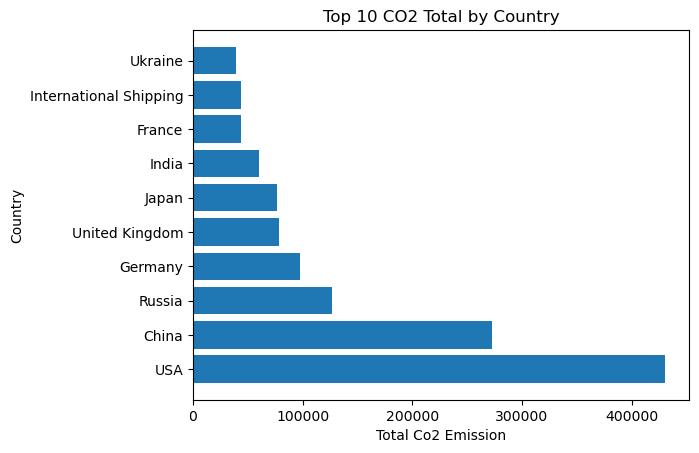

In [7]:
top_10 = Mean_dataset.groupby('Country')['Total Co2 Emission (Mt)'].sum().nlargest(10).reset_index()  # Add the total emission per country and select the ten highest values

plt.barh(y=top_10["Country"], width=top_10['Total Co2 Emission (Mt)'])
plt.xlabel('Total Co2 Emission')
plt.ylabel('Country')
plt.title('Top 10 CO2 Total by Country')

plt.show()


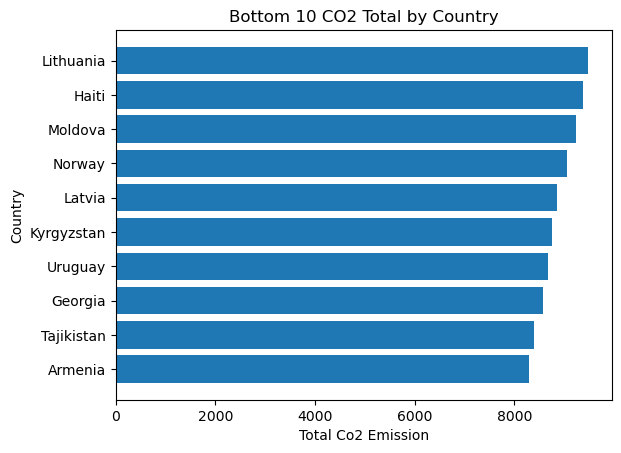

In [8]:
bottom_10 = Mean_dataset.groupby('Country')['Total Co2 Emission (Mt)'].sum().nsmallest(10).reset_index()  # Add the total emission per country and select the ten lowest values

plt.barh(y=bottom_10["Country"], width=bottom_10['Total Co2 Emission (Mt)'])
plt.xlabel('Total Co2 Emission')
plt.ylabel('Country')
plt.title('Bottom 10 CO2 Total by Country')

plt.show()
